# Decision Tree income prediction
 Predict the income of a given population which is labelled as <=50𝐾𝑎𝑛𝑑>50K.

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [132]:
df=pd.read_csv('adult_dataset.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Removing unknown values
The data had unknown values marked as '?'. We would observe their quantity and remove them if they are significantly low.

In [134]:
df_col=list(df.columns)
for i in range(len(df_col)):
    su=0
    su=len(df[df.iloc[:,i]=='?'])
    x=df_col[i]
    print(str(x)+"......"+str(su))
    if su>0:
        df=df[df[x]!='?']
print("\n\n\n...............................")
print("The total count of missing values was less than 5%. So we removed them.")
print("...............................\n\n\n")
print("\n\n\n...............................")
print("After removal")
print("...............................\n\n\n")
for i in range(len(df_col)):
    su=0
    su=len(df[df.iloc[:,i]=='?'])
    x=df_col[i]
    print(str(x)+"......"+str(su))

age......0
workclass......1836
fnlwgt......0
education......0
education.num......0
marital.status......0
occupation......7
relationship......0
race......0
sex......0
capital.gain......0
capital.loss......0
hours.per.week......0
native.country......556
income......0



...............................
The total count of missing values was less than 5%. So we removed them.
...............................






...............................
After removal
...............................



age......0
workclass......0
fnlwgt......0
education......0
education.num......0
marital.status......0
occupation......0
relationship......0
race......0
sex......0
capital.gain......0
capital.loss......0
hours.per.week......0
native.country......0
income......0


In [135]:
df.shape

(30162, 15)

### Data preparation
Encoding categorical variables into standard format using LabelEncoder mwethod of sklearn, so that sklearn can understand them and make a tree

In [136]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_cat=df.select_dtypes(include='object')
print(df_cat.head())
df_cat=df_cat.apply(le.fit_transform)
df_cat.head()

  workclass     education marital.status         occupation   relationship  \
1   Private       HS-grad        Widowed    Exec-managerial  Not-in-family   
3   Private       7th-8th       Divorced  Machine-op-inspct      Unmarried   
4   Private  Some-college      Separated     Prof-specialty      Own-child   
5   Private       HS-grad       Divorced      Other-service      Unmarried   
6   Private          10th      Separated       Adm-clerical      Unmarried   

    race     sex native.country income  
1  White  Female  United-States  <=50K  
3  White  Female  United-States  <=50K  
4  White  Female  United-States  <=50K  
5  White  Female  United-States  <=50K  
6  White    Male  United-States  <=50K  


,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,2,11,6,3,1,4,0,38,0
3,2,5,0,6,4,4,0,38,0
4,2,15,5,9,3,4,0,38,0
5,2,11,0,7,4,4,0,38,0
6,2,0,5,0,4,4,1,38,0


In [137]:
df=df.drop(df_cat.columns,axis=1)
df=pd.concat([df,df_cat],axis=1)
df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,82,132870,9,0,4356,18,2,11,6,3,1,4,0,38,0
3,54,140359,4,0,3900,40,2,5,0,6,4,4,0,38,0
4,41,264663,10,0,3900,40,2,15,5,9,3,4,0,38,0
5,34,216864,9,0,3770,45,2,11,0,7,4,4,0,38,0
6,38,150601,6,0,3770,40,2,0,5,0,4,4,1,38,0


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30162 non-null  int64
 1   fnlwgt          30162 non-null  int64
 2   education.num   30162 non-null  int64
 3   capital.gain    30162 non-null  int64
 4   capital.loss    30162 non-null  int64
 5   hours.per.week  30162 non-null  int64
 6   workclass       30162 non-null  int64
 7   education       30162 non-null  int64
 8   marital.status  30162 non-null  int64
 9   occupation      30162 non-null  int64
 10  relationship    30162 non-null  int64
 11  race            30162 non-null  int64
 12  sex             30162 non-null  int64
 13  native.country  30162 non-null  int64
 14  income          30162 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


In [139]:
#converting income to categorical
df['income']=df.income.astype('category')

### Model building and evaluation

In [140]:
#splitting into X and y
y=df.pop('income')
X=df

#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.7,train_size=0.3,random_state=100)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
X_train.info()

(9048, 14) (21114, 14) (9048,) (21114,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9048 entries, 6105 to 6052
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             9048 non-null   int64
 1   fnlwgt          9048 non-null   int64
 2   education.num   9048 non-null   int64
 3   capital.gain    9048 non-null   int64
 4   capital.loss    9048 non-null   int64
 5   hours.per.week  9048 non-null   int64
 6   workclass       9048 non-null   int64
 7   education       9048 non-null   int64
 8   marital.status  9048 non-null   int64
 9   occupation      9048 non-null   int64
 10  relationship    9048 non-null   int64
 11  race            9048 non-null   int64
 12  sex             9048 non-null   int64
 13  native.country  9048 non-null   int64
dtypes: int64(14)
memory usage: 1.0 MB


In [141]:
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [142]:
# checking the results and the output
from sklearn.metrics import classification_report, confusion_matrix
y_pred_default=dt_default.predict(X_test)
print(classification_report(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     15884
           1       0.77      0.51      0.61      5230

    accuracy                           0.84     21114
   macro avg       0.81      0.73      0.76     21114
weighted avg       0.83      0.84      0.83     21114



In [143]:
# building a confusion matrix
from sklearn.metrics import accuracy_score
print(confusion_matrix(y_true=y_test,y_pred=y_pred_default))
print(accuracy_score(y_true=y_test,y_pred=y_pred_default))

[[15065   819]
 [ 2556  2674]]
0.840153452685422


### Plotting decision tree

In [144]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus,graphviz

features=list(X_train.columns)
features

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country']

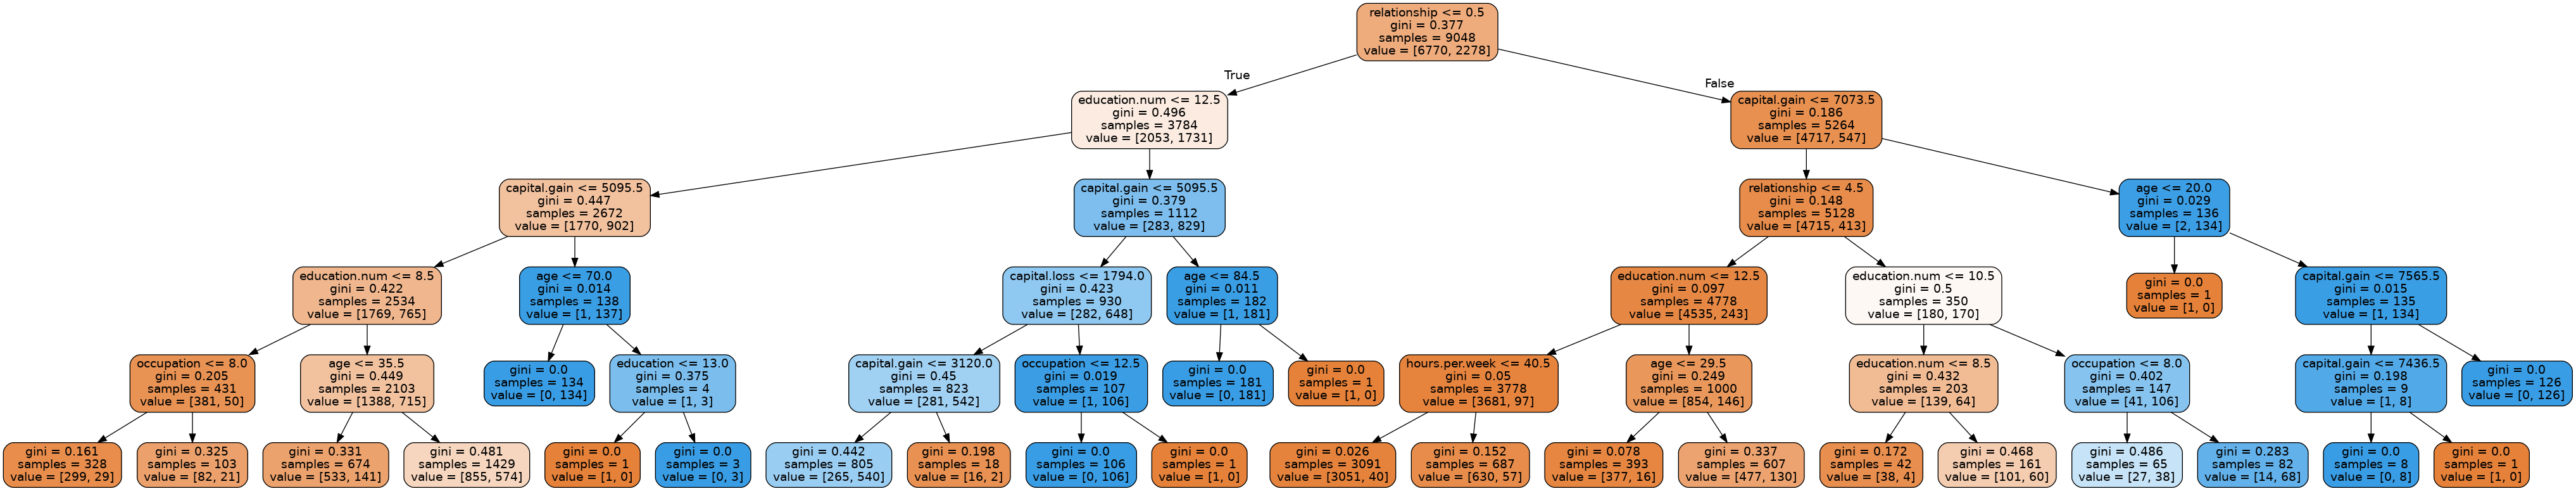

In [145]:
dot_data=StringIO()
export_graphviz(dt_default,out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Hyperparameter tuning

In [146]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

param_grid={'max_depth':range(5,15,5),
            'min_samples_leaf':range(50,150,50),
            'min_samples_split':range(50,150,50),
            'criterion':['entropy','gini']
           }
n_folds=5
dtree=DecisionTreeClassifier()
grid_search=GridSearchCV(estimator=dtree,param_grid=param_grid,
                        cv=n_folds,verbose=1)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    1.5s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [147]:
cv_results=pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014941,0.000746,0.002209,0.000063,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.849724,0.845856,0.833149,0.846324,0.841349,0.843280,0.005723,15
1,0.013884,0.000163,0.002221,0.000082,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.849724,0.845856,0.833149,0.846324,0.841349,0.843280,0.005723,15
2,0.014116,0.000347,0.002210,0.000199,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.852486,0.848066,0.833149,0.847430,0.840796,0.844385,0.006746,7
3,0.014029,0.000359,0.002185,0.000119,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.852486,0.848066,0.833149,0.847430,0.840796,0.844385,0.006746,7
4,0.019989,0.000287,0.002400,0.000512,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.851934,0.849724,0.837569,0.845771,0.844666,0.845933,0.004939,5
5,0.019997,0.000302,0.002158,0.000125,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.851934,0.849724,0.837569,0.845771,0.844666,0.845933,0.004939,5
6,0.017800,0.000247,0.002158,0.000136,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.853591,0.843646,0.838122,0.850193,0.859038,0.848918,0.007352,2
7,0.018730,0.000520,0.002266,0.000229,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.853591,0.843646,0.838122,0.851299,0.859038,0.849139,0.007403,1
8,0.012491,0.000102,0.001973,0.000162,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.853591,0.845856,0.834254,0.845218,0.841349,0.844054,0.006307,11
9,0.012120,0.000144,0.002091,0.000069,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.853591,0.845856,0.834254,0.845218,0.841349,0.844054,0.006307,11


In [148]:
# printing best score and best parameters
print("Best score is",grid_search.best_score_)
print("Best parameters are",grid_search.best_params_)

Best score is 0.8491392637793233
Best parameters are {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 100}


### Running the model with best hyperparameters

In [149]:
model_opt=DecisionTreeClassifier(criterion='entropy',
                                 max_depth=10,
                                 min_samples_leaf=100,
                                 min_samples_split=100)
model_opt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)

In [150]:
model_opt.score(X_train,y_train)

0.8522325375773652

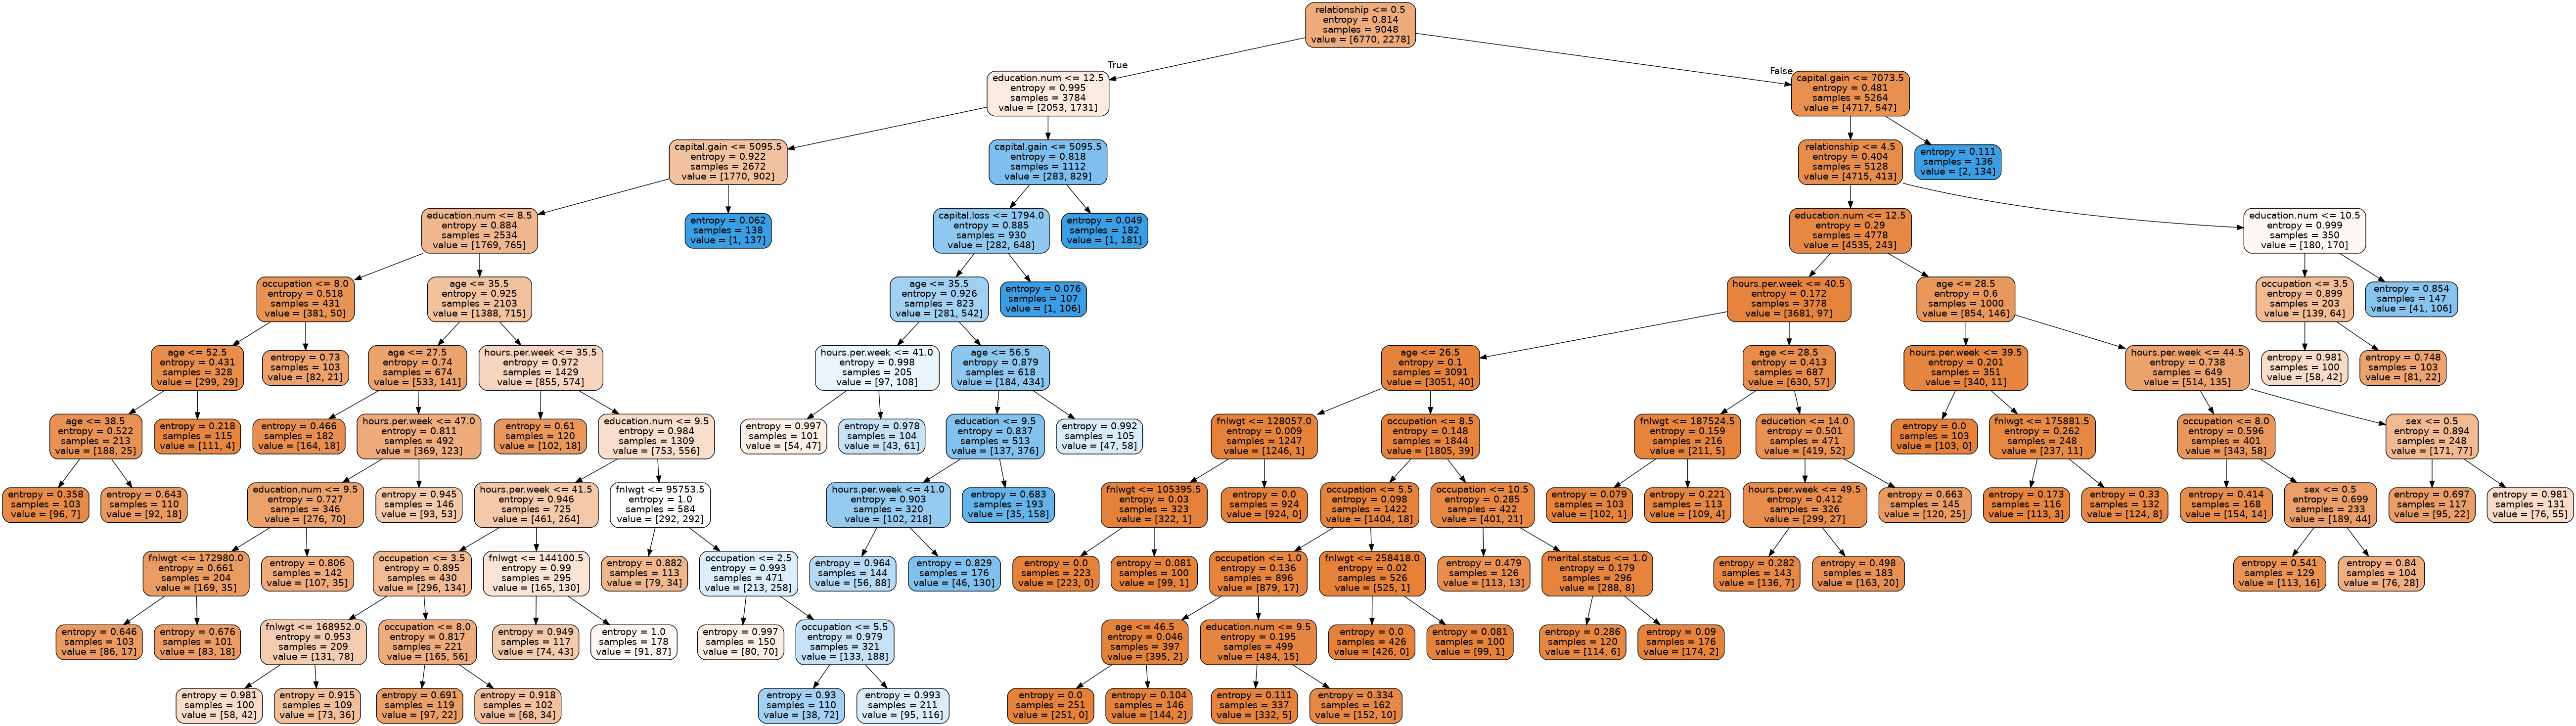

In [151]:
dot_data=StringIO()
export_graphviz(model_opt,out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [152]:
# tree is to complex and we need to reduce its depth
# reducing the depth to 3
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

# score
print(clf_gini.score(X_test,y_test))

0.8348962773515203


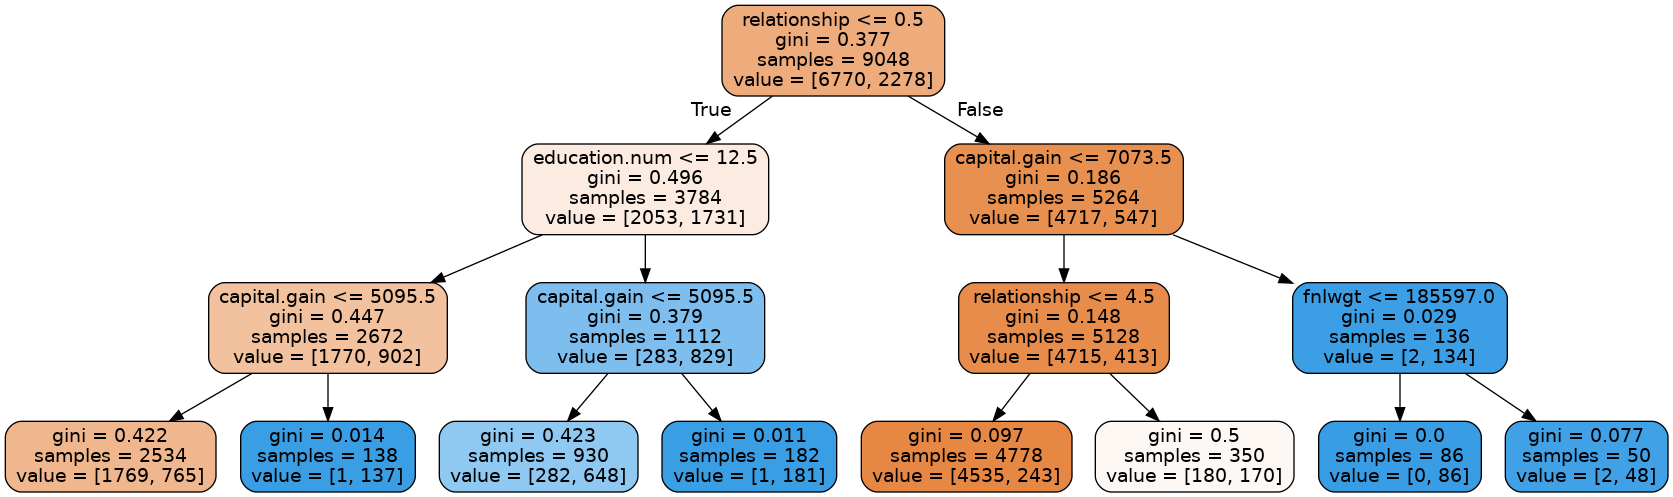

In [153]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [154]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     15884
           1       0.77      0.47      0.59      5230

    accuracy                           0.83     21114
   macro avg       0.81      0.71      0.74     21114
weighted avg       0.83      0.83      0.82     21114



In [155]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[15159   725]
 [ 2761  2469]]
